In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Input, Dense, LSTM, TimeDistributed, GRU, SimpleRNN
from keras.models import Model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


In [0]:
file_1 = '/data/binance/train_df_80.csv' #data generated using current mid trade prices, Y is current mid too
file_2 = '/data/binance/train_df_80_next.csv'#data generated using next mid trade prices and Y is next mid too (t+1)

In [4]:
data = pd.read_csv(file_1)
pd.set_option('display.max_columns', 82)
data.rename(columns={'Unnamed: 0':'TimeStamp'}, inplace=True)
print(data.shape)
data.head()

(9514, 82)


,TimeStamp,B_P1,B_V1,B_P2,B_V2,B_P3,B_V3,B_P4,B_V4,B_P5,B_V5,B_P6,B_V6,B_P7,B_V7,B_P8,B_V8,B_P9,B_V9,B_P10,B_V10,B_P11,B_V11,B_P12,B_V12,B_P13,B_V13,B_P14,B_V14,B_P15,B_V15,B_P16,B_V16,B_P17,B_V17,B_P18,B_V18,B_P19,B_V19,B_P20,B_V20,S_P1,S_V1,S_P2,S_V2,S_P3,S_V3,S_P4,S_V4,S_P5,S_V5,S_P6,S_V6,S_P7,S_V7,S_P8,S_V8,S_P9,S_V9,S_P10,S_V10,S_P11,S_V11,S_P12,S_V12,S_P13,S_V13,S_P14,S_V14,S_P15,S_V15,S_P16,S_V16,S_P17,S_V17,S_P18,S_V18,S_P19,S_V19,S_P20,S_V20,Mid
0,1.521332e+09,0.069306,0.334,0.069309,0.015,0.069313,0.367,0.069314,4.328,0.069316,0.400,0.069319,0.016,0.069337,0.299,0.069343,0.275,0.069360,0.130,0.069363,0.109,0.069373,20.000,0.069374,0.536,0.069376,0.074,0.069378,0.040,0.069400,1.219,0.069404,0.269,0.069406,0.084,0.069416,0.090,0.069429,0.327,0.069430,0.864,0.069556,0.000,0.069556,0.000,0.069556,0.00,0.069556,0.000,0.069556,0.000,0.069556,0.000,0.069556,0.000,0.069556,0.000,0.069556,0.000,0.069556,0.00,0.069556,0.0,0.069556,0.0,0.069557,0.000,0.069556,1.724,0.069557,0.283,0.069558,4.166,0.069559,0.870,0.069560,23.200,0.069568,0.372,0.069569,1.248,0.069578
1,1.521333e+09,0.069009,0.334,0.069010,0.279,0.069011,0.030,0.069012,0.016,0.069016,0.350,0.069030,0.058,0.069039,0.320,0.069042,0.539,0.069050,0.500,0.069054,0.015,0.069065,0.179,0.069076,0.129,0.069082,0.184,0.069095,0.261,0.069099,0.370,0.069100,5.115,0.069105,3.040,0.069106,3.441,0.069160,0.471,0.069161,0.328,0.069216,0.000,0.069216,0.000,0.069216,0.00,0.069216,0.000,0.069216,0.000,0.069216,0.000,0.069217,0.000,0.069217,0.000,0.069217,0.000,0.069218,0.00,0.069219,0.0,0.069221,0.0,0.069226,0.000,0.069215,1.451,0.069237,0.500,0.069238,0.001,0.069241,0.278,0.069244,1.933,0.069247,0.536,0.069250,19.809,0.069264
2,1.521333e+09,0.068680,1.000,0.068690,1.001,0.068694,0.475,0.068695,2.238,0.068700,0.111,0.068708,0.350,0.068710,5.000,0.068715,0.050,0.068733,0.275,0.068739,0.370,0.068740,1.149,0.068741,0.410,0.068743,0.390,0.068749,0.015,0.068750,0.404,0.068751,0.080,0.068778,5.188,0.068779,2.916,0.068780,0.676,0.068781,0.390,0.068873,0.000,0.068873,0.000,0.068873,0.00,0.068873,0.000,0.068873,0.000,0.068873,0.000,0.068873,0.000,0.068873,0.000,0.068873,0.000,0.068873,0.00,0.068873,0.0,0.068873,0.0,0.068873,0.000,0.068874,0.000,0.068873,1.528,0.068874,1.332,0.068875,1.362,0.068879,0.075,0.068896,1.400,0.068899,5.695,0.068901
3,1.521333e+09,0.068332,0.147,0.068340,1.317,0.068341,0.159,0.068350,4.000,0.068358,5.000,0.068359,0.365,0.068368,1.034,0.068371,0.261,0.068378,0.299,0.068390,0.320,0.068400,0.897,0.068409,0.705,0.068411,0.320,0.068413,0.330,0.068424,0.984,0.068452,0.808,0.068465,25.135,0.068467,0.897,0.068470,0.247,0.068473,0.523,0.068547,0.481,0.068548,3.345,0.068550,0.35,0.068560,0.527,0.068592,0.758,0.068601,0.889,0.068602,0.841,0.068603,0.759,0.068606,2.014,0.068620,2.46,0.068642,0.1,0.068644,5.2,0.068649,0.275,0.068663,0.159,0.068664,0.334,0.068670,0.684,0.068673,0.635,0.068678,5.586,0.068679,0.056,0.068680,2.021,0.068488
4,1.521334e+09,0.068062,0.320,0.068064,0.819,0.068067,0.400,0.068069,0.040,0.068070,0.707,0.068071,1.049,0.068074,0.200,0.068075,0.015,0.068090,0.533,0.068095,0.090,0.068096,0.293,0.068099,0.335,0.068100,1.191,0.068105,0.673,0.068110,1.182,0.068115,0.262,0.068118,0.110,0.068140,2.142,0.068148,0.507,0.068155,0.575,0.068233,0.000,0.068233,0.000,0.068233,0.00,0.068233,0.000,0.068233,0.000,0.068233,0.000,0.068233,0.000,0.068233,0.000,0.068233,0.000,0.068233,0.00,0.068233,0.0,0.068233,0.0,0.068233,0.000,0.068233,0.000,0.068233,0.000,0.068234,0.000,0.068233,4.103,0.068234,1.311,0.068236,1.575,0.068245,0.939,0.068260


In [0]:
data.describe() #Note: The min values for Buys (0.00) are due to index 2193 where there were only sells and I had to generate buys at 0 price myself. 

,TimeStamp,B_P1,B_V1,B_P2,B_V2,B_P3,B_V3,B_P4,B_V4,B_P5,B_V5,B_P6,B_V6,B_P7,B_V7,B_P8,B_V8,B_P9,B_V9,B_P10,B_V10,B_P11,B_V11,B_P12,B_V12,B_P13,B_V13,B_P14,B_V14,B_P15,B_V15,B_P16,B_V16,B_P17,B_V17,B_P18,B_V18,B_P19,B_V19,B_P20,B_V20,S_P1,S_V1,S_P2,S_V2,S_P3,S_V3,S_P4,S_V4,S_P5,S_V5,S_P6,S_V6,S_P7,S_V7,S_P8,S_V8,S_P9,S_V9,S_P10,S_V10,S_P11,S_V11,S_P12,S_V12,S_P13,S_V13,S_P14,S_V14,S_P15,S_V15,S_P16,S_V16,S_P17,S_V17,S_P18,S_V18,S_P19,S_V19,S_P20,S_V20,Mid
count,9.514000e+03,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,1.523049e+09,0.061636,3.627205,0.061640,3.002816,0.061643,2.550030,0.061647,2.793361,0.061650,2.649340,0.061653,2.961537,0.061657,2.759040,0.061661,2.652076,0.061664,3.284917,0.061668,3.440302,0.061672,3.281522,0.061676,3.440399,0.061680,3.730199,0.061685,3.484023,0.061689,3.936535,0.061694,3.646668,0.061699,3.557630,0.061703,4.121046,0.061707,5.030243,0.061712,4.683297,0.061761,4.292670,0.061765,3.303834,0.061768,3.537026,0.061772,2.960016,0.061776,2.924852,0.061780,3.396190,0.061784,2.670079,0.061788,2.923785,0.061792,3.219765,0.061796,3.048011,0.061799,3.086569,0.061803,3.008947,0.061806,2.791208,0.061810,2.764117,0.061813,2.662022,0.061817,2.714375,0.061820,2.566109,0.061823,2.797688,0.061827,3.009496,0.061830,3.182261,0.061733
std,9.907031e+05,0.005275,24.004896,0.005275,17.631047,0.005276,12.559632,0.005276,15.713202,0.005277,17.989741,0.005277,15.618765,0.005278,13.368415,0.005278,14.824063,0.005278,23.100091,0.005279,19.236204,0.005279,18.856837,0.005279,22.133860,0.005280,24.824639,0.005280,20.982921,0.005280,25.991763,0.005280,22.334279,0.005280,20.292309,0.005280,24.444641,0.005281,32.044752,0.005281,33.030913,0.005244,32.873833,0.005244,22.682459,0.005245,37.684713,0.005246,20.704622,0.005247,18.218669,0.005248,31.570468,0.005249,13.007621,0.005251,25.533742,0.005253,29.380002,0.005255,18.820859,0.005257,18.898533,0.005259,17.286540,0.005262,24.508341,0.005265,16.841287,0.005268,15.699825,0.005272,14.148609,0.005275,13.810349,0.005279,17.306232,0.005283,20.798251,0.005287,15.367492,0.005240
min,1.521332e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053796,0.000000,0.053797,0.000000,0.053799,0.000000,0.053800,0.000000,0.053804,0.000000,0.053805,0.000000,0.053806,0.000000,0.053813,0.000000,0.053815,0.000000,0.053822,0.000000,0.053831,0.000000,0.053842,0.000000,0.053843,0.000000,0.053858,0.000000,0.053862,0.000000,0.053870,0.000000,0.053875,0.000000,0.053879,0.000000,0.053886,0.000000,0.053887,0.000000,0.053777
25%,1.522191e+09,0.056673,0.196000,0.056675,0.150000,0.056679,0.130000,0.056681,0.096000,0.056683,0.078000,0.056685,0.060000,0.056689,0.056000,0.056690,0.056000,0.056693,0.051250,0.056696,0.048000,0.056700,0.042000,0.056703,0.045000,0.056708,0.040000,0.056710,0.040000,0.

**Note on below graph and training/test sets:**
Since its a time series we need to keep the order of the data and therefore cant shuffle the data nor can we cross validate. So we will start training form time zero and then test on the later dates. 
Now since the only major price rise is at the end of the sequence, no matter how small we set the test set (0.1, 0.2 or 0.3 of the training) our model still wont be able to learn how to behave at this price range and so will fail at generating good results for this unseen data during test. So for now I am going to dismiss the data after the red dot on the right. 

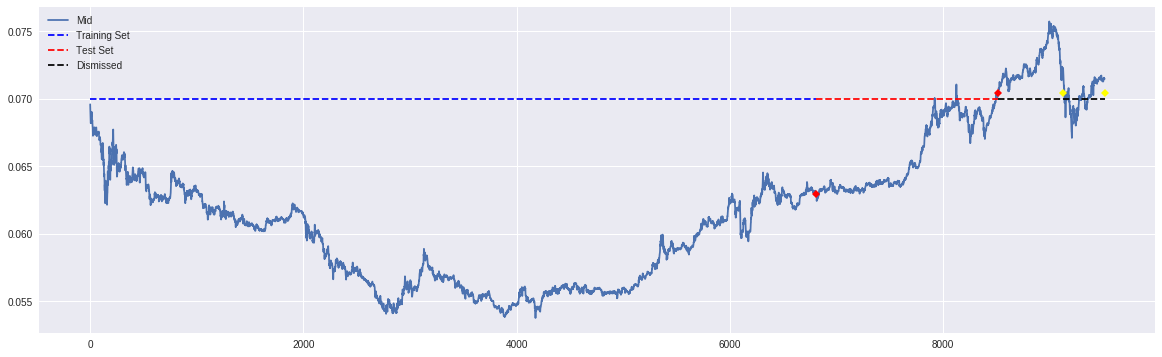

In [0]:
plt.figure(figsize=(20,6))
plt.plot(data.Mid)
plt.plot([6811], [data.Mid[6811]], marker='D', markersize=5, color="red") 
plt.plot([8514], [data.Mid[8514]], marker='D', markersize=5, color="red")
plt.plot([0, 6811], [0.07, 0.07], 'b--', label='Training Set')
plt.plot([6811, 8514], [0.07, 0.07], 'r--', label='Test Set')
plt.plot([8514, 9514], [0.07, 0.07], 'k--', label='Dismissed')
plt.plot([9120], [data.Mid[8514]], marker='D', markersize=5, color="yellow") #including the data between the yellow points in the classification model 
plt.plot([9513], [data.Mid[8514]], marker='D', markersize=5, color="yellow")
plt.legend()

In [0]:
#Separating the data into training and test sets, start arg is the index to start from in case needed to dismiss the early rows as they were quite off from the mid
def train_test_split(X, y, start=0, ratio=0.2):
  
  samples = int(X[start:].shape[0] * (1 - ratio))
  idx_to = start + samples
  
  X_train = X[start:idx_to, :]
  y_train = y[start:idx_to, :]
  X_test = X[idx_to:, :]
  y_test = y[idx_to:, :]
  
  return X_train, y_train, X_test, y_test


In [0]:
def reshape_to_batches(a, batch_size):
    #pad if the length is not divisible by the batch_size
    batch_num = np.ceil(a.shape[0] / float(batch_size))
    modulo = batch_num * batch_size - a.shape[0]
    if modulo != 0:
        pad = np.zeros((int(modulo), a.shape[1]))
        a = np.vstack((a, pad))
    return np.array(np.split(a, batch_num))

In [0]:
#function to transform 3d batches to 2d
def _3d_to_2d(arr):
    return arr.reshape(arr.shape[0] * arr.shape[1], arr.shape[2])

In [0]:
pipeline = Pipeline([('scaling', StandardScaler()), ])

X_y = pipeline.fit_transform(data.values)
print(X_y.shape)

(9514, 82)


In [0]:
#Separating X and y values

y = np.expand_dims(X_y[:-1000,-1], axis=1) #exclusing the last 1k samples with the sharp price rise not seen in the rest of the training data

X = X_y[:-1000,:-1]

In [0]:
X_train, y_train, X_test, y_test = train_test_split(X, y)  
print(len(X_train), len(y_train), len(X_test), len(y_test))

In [0]:
#Batch size is important, any dependencies further apart from the Batch_size will not be taken into account. We could in theory give only one batch 
#with the entire sequence but that will take an excessive amount of time to train and also the success is not guaranteed (vanishing gradient problem).

batch_size = 30 #30 is about 165 minute (5.5min per ts x 30), tried 15 and a few other values too but 30 seems to be the best

X_train_batch = reshape_to_batches(X_train, batch_size)
y_train_batch = reshape_to_batches(y_train, batch_size)
print(X_train_batch.shape, y_train_batch.shape)

X_test_batch = reshape_to_batches(X_test, batch_size)
y_test_batch = reshape_to_batches(y_test, batch_size)
print(X_test_batch.shape, y_test_batch.shape)

(228, 30, 81) (228, 30, 1)
(57, 30, 81) (57, 30, 1)


**Creating two baseline models, a lstm and a gru**

In [0]:
#Allows the network to accept batches of any size as input when predicting 
inputs = Input(shape=(None, 81)) 

In [0]:
lstm = LSTM(32, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
            recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
            recurrent_dropout=0.0, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

#output layer
predictions = TimeDistributed(Dense(1, activation='linear'))(lstm)

model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])


In [0]:
model.fit(X_train_batch, y_train_batch, epochs=500) 

In [0]:
y_pred = model.predict(X_test_batch)

print(y_pred.shape)

(114, 15, 2)


In [0]:
#relu
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703])) 
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.027633385662111893
0.0023870085485574333


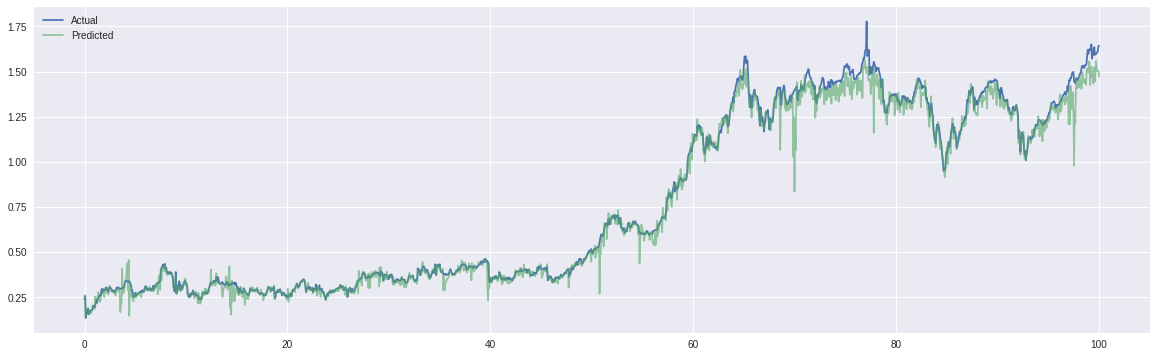

In [0]:
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

In [0]:
#linear, 30 batch
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703])) 
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.026032380204911144
0.0020825046756937516


Results for data in file_1 (current mid) :

In [0]:
y_pred = model.predict(X_test_batch)

print(y_pred.shape)

(57, 30, 1)


In [0]:
# **** with 32n, 1000 epoch 
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703])) 
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.05534698359891795
0.007423645550163364


Text(0,0.5,'Predicted')

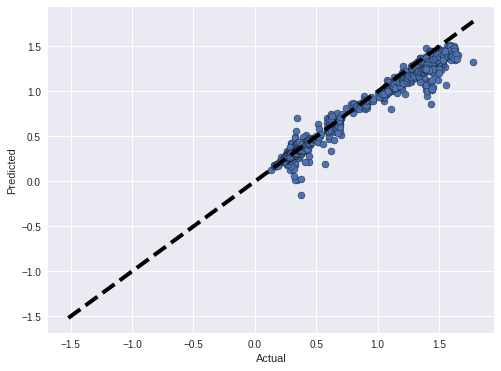

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, _3d_to_2d(y_pred)[:1703], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

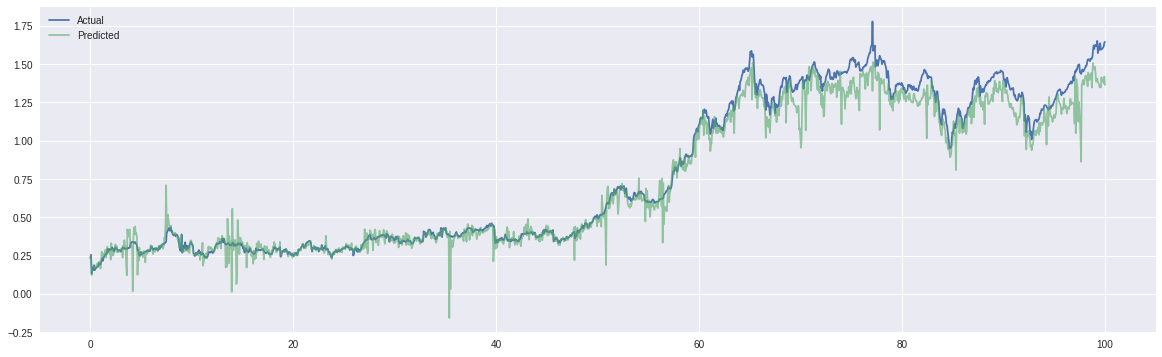

In [0]:
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

**Playing around with model parameters and saving the model with lowest error:**

In [0]:
inputs = Input(shape=(None, 81)) 
lstm = LSTM(128, activation='relu', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
            recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
            recurrent_dropout=0.0, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

predictions = TimeDistributed(Dense(1, activation='linear'))(lstm) #relu for first layer and linear here, rather than (tahn->linear)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [0]:
model.fit(X_train_batch, y_train_batch, epochs=500)

In [0]:
inputs = Input(shape=(None, 81)) 
lstm = LSTM(128, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
            recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
            recurrent_dropout=0.0, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

predictions = TimeDistributed(Dense(1, activation='relu'))(lstm) #relu was better than linear and sigmoid 
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])


In [0]:
model.fit(X_train_batch, y_train_batch, epochs=500)

In [0]:
y_pred = model.predict(X_test_batch)

In [0]:
#*** 128n, 100 epoch, 1st layer tahn/ 2nd linear activation
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.05783199436440092
0.005886852171695603


In [0]:
#*** 128n, 500 epoch, 1st layer tahn/ 2nd linear activation
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.026803837955772108
0.002149092880107871


In [0]:
#*** 128n, 500 epoch, 1st layer tahn / 2nd relu activation
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.021652418885788196
0.0016998096274428883


In [0]:
#*** 128n, 500 epoch, 1st layer tahn / 2nd sigmoid activation
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.15321244518729207
0.05683670810083511


In [0]:
#*** 128n, 500 epoch, 1st layer relu / 2nd linear activation
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.0313031639104963
0.0021611357205365885


In [0]:
#*** 128n, 1000 epoch, 1st layer tahn/ 2nd linear activation
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.02945797656875249
0.0021923991686962348


In [0]:
#*** 254n, 1000 epoch, 1st layer tahn/ 2nd linear activation
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.04609493455646105
0.005211766658282791


Text(0,0.5,'Predicted')

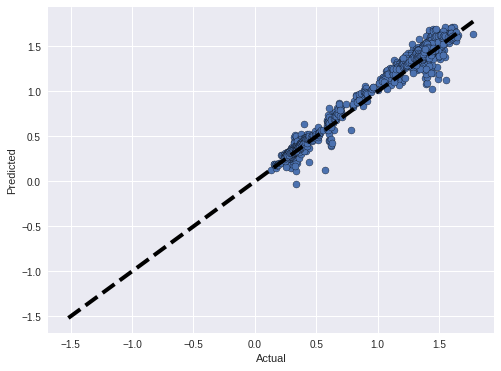

In [0]:
#*** 128n, 100 epoch, 1st layer tahn/ linear activation
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, _3d_to_2d(y_pred)[:1703], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

Text(0,0.5,'Predicted')

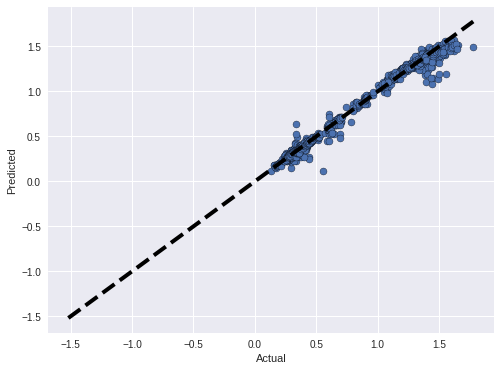

In [0]:
#*** with 128, 500 epoch, tahn/linear
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, _3d_to_2d(y_pred)[:1703], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

Text(0,0.5,'Predicted')

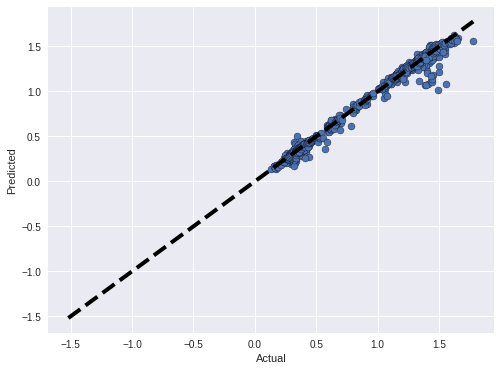

In [0]:
#*** 128n, 500 epoch with tahn/relu activation
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, _3d_to_2d(y_pred)[:1703], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

Text(0,0.5,'Predicted')

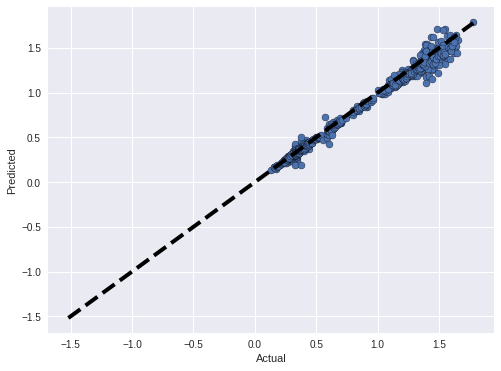

In [0]:
#*** 128n, 500 epoch with relu/linear activation
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, _3d_to_2d(y_pred)[:1703], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

Text(0,0.5,'Predicted')

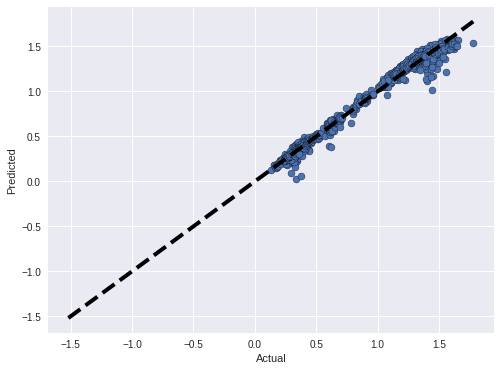

In [0]:
#*** with 128, 1000 epoch, tahn/linear
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, _3d_to_2d(y_pred)[:1703], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

Text(0,0.5,'Predicted')

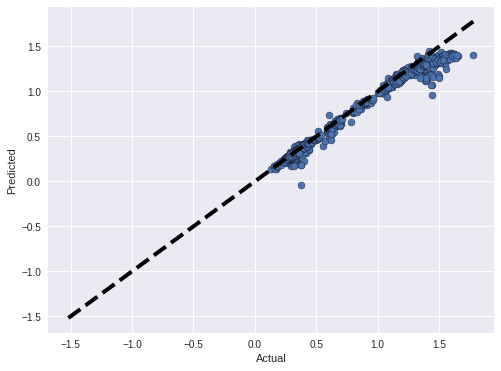

In [0]:
#*** with 254, 1000 epoch, tahn/linear
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, _3d_to_2d(y_pred)[:1703], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

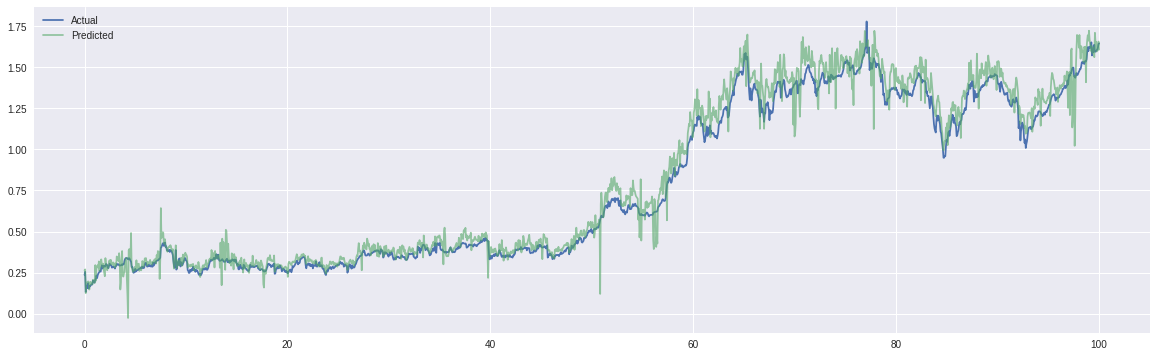

In [0]:
#*** with 128, 100 epoch
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

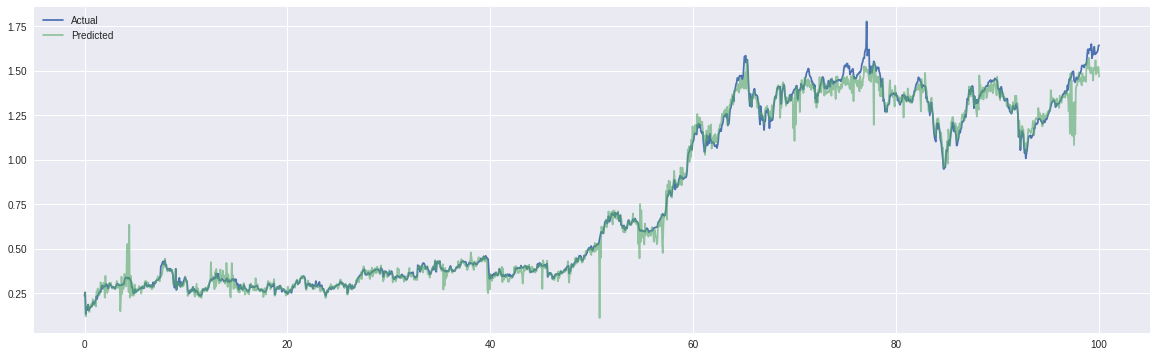

In [0]:
#*** 128n, 500 epoch, tahn/linear
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

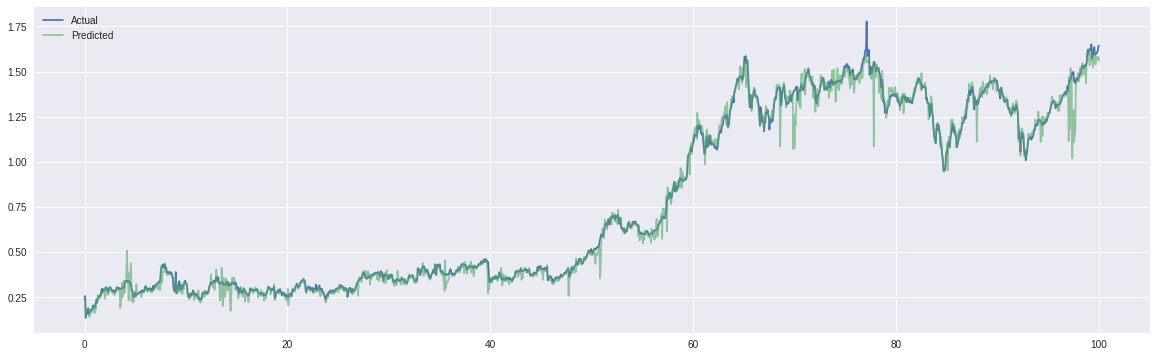

In [0]:
#*** 128n, 500 epoch, tahn/Relu activation
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

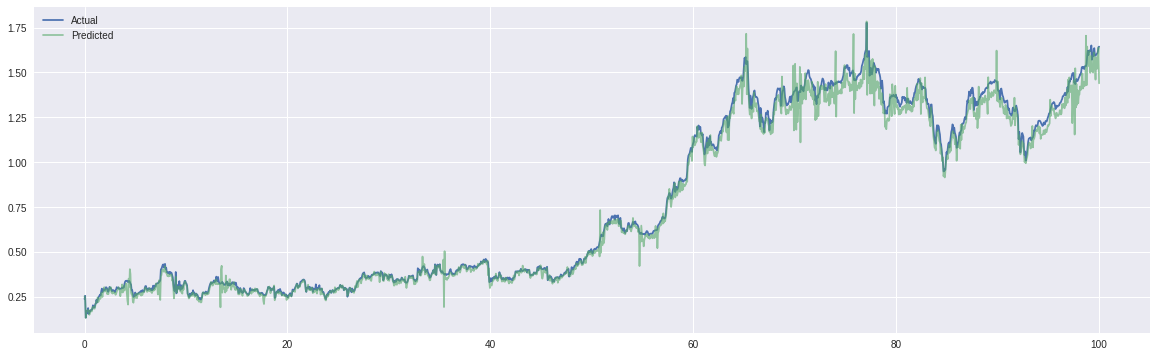

In [0]:
#*** 128n, 500 epoch, Relu/linear activation
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

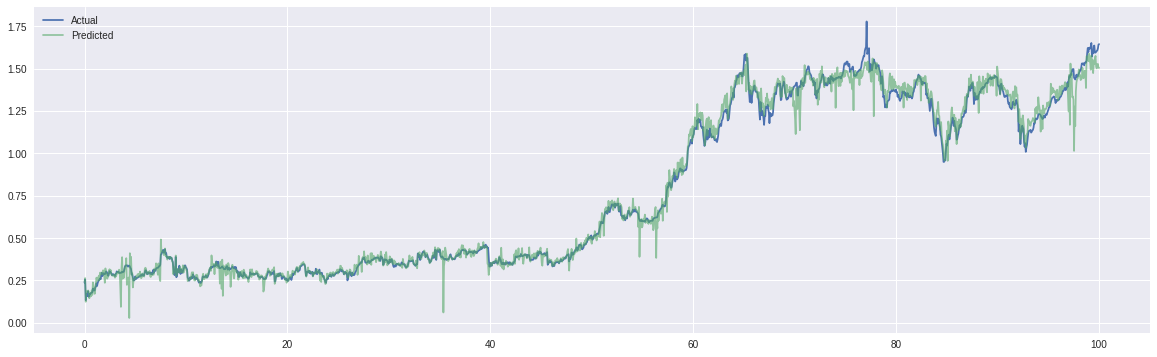

In [0]:
#*** with 128, 1000 epoch, tahn/linear
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

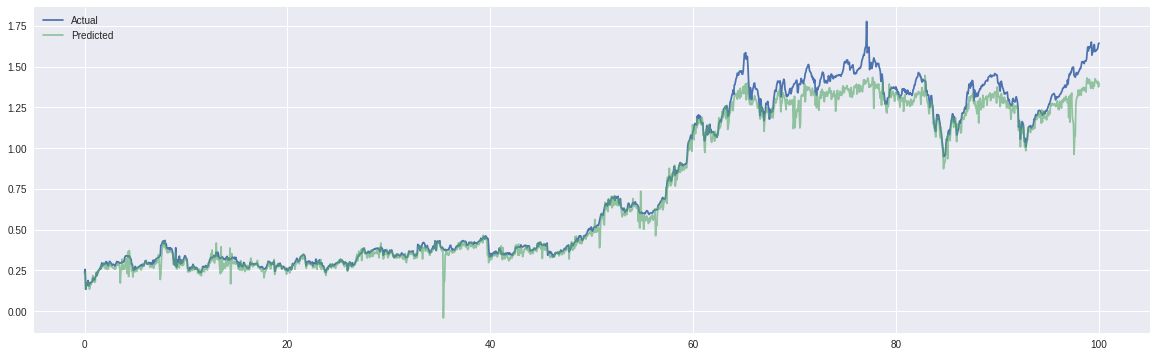

In [0]:
#*** with 254, 1000 epoch, tahn/linear
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

In [0]:
#model.save('/content/drive/My Drive/Vega/MachineLearning/data/binance/model_128n_500e_tahnLinear')
#model.save('/content/drive/My Drive/Vega/MachineLearning/data/binance/model_128n_500e_tahnRelu')

In [0]:
model_1 = '/content/drive/My Drive/Vega/MachineLearning/data/binance/model_128n_500e_tahnLinear'
model_2 = '/content/drive/My Drive/Vega/MachineLearning/data/binance/model_128n_500e_tahnRelu'

from keras.models import load_model

model_saved = load_model(model_2)

In [0]:
y_pred = model_saved.predict(X_test_batch)

In [0]:
#*** From the saved model: 128n, 500 epoch
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.021652418885788196
0.0016998096274428883


In [0]:
model_saved.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, None, 81)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 128)         107520    
_________________________________________________________________
time_distributed_12 (TimeDis (None, None, 1)           129       
Total params: 107,649
Trainable params: 107,649
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.utils.vis_utils import plot_model #need to install graphviz and pydot for it to work

plot_model(model_saved, to_file='/content/drive/My Drive/Vega/MachineLearning/data/binance/model_128n_500e_tahnLinear.png', show_shapes=True, show_layer_names=True)


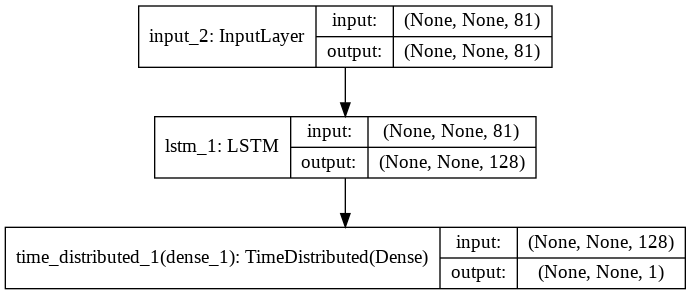

In [0]:
from IPython.display import Image

Image(filename='/content/drive/My Drive/Vega/MachineLearning/data/binance/model_128n_500e_tahnLinear.png')

Trying the best model above (128n, 500epoch) with regularisation:

In [0]:
inputs = Input(shape=(None, 81))

from keras import regularizers

lstm = LSTM(128, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=regularizers.l2(0.001), 
            recurrent_regularizer=regularizers.l2(0.001), bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.3, 
            recurrent_dropout=0.04, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

#dense =  TimeDistributed(Dense(64, activation='sigmoid'))(lstm)
predictions = TimeDistributed(Dense(1, activation='relu'))(lstm)
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])


In [0]:
model.fit(X_train_batch, y_train_batch, epochs=500)

228/228 [==============================] - 1s 3ms/step - loss: 0.5899 - acc: 0.0042
Epoch 493/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5896 - acc: 0.0042
Epoch 494/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5893 - acc: 0.0042
Epoch 495/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5897 - acc: 0.0042
Epoch 496/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5900 - acc: 0.0042
Epoch 497/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5893 - acc: 0.0042
Epoch 498/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5894 - acc: 0.0042
Epoch 499/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5899 - acc: 0.0042
Epoch 500/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5900 - acc: 0.0042


In [0]:
y_pred = model.predict(X_test_batch)

In [0]:
#*** 15batchsize, 128n, 500 epoch with 0.001 reg
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.05529172252355426
0.005597169298911946


In [0]:
#inverse transforming the scaled values to real values
def time_series_df(XTest_batch, y_pred):
    if len(y_pred.shape) > 2:
        y_pred = _3d_to_2d(y_pred)
    y_pred_flat  = np.reshape(y_pred, -1)
    time = np.reshape(_3d_to_2d(XTest_batch)[:, 0], -1)
    # remove padding
    if time.shape[0] != y_pred_flat.shape[0]:
        time = time[:y_pred_flat.shape[0]]
        
    to_inverse = np.zeros((y_pred_flat.shape[0], 82))
    to_inverse[:, 0] = time
    to_inverse[:, 1] = y_pred_flat
    y_transform = pd.DataFrame(pipeline.inverse_transform(to_inverse)[:, 0:2])
        
    return y_transform

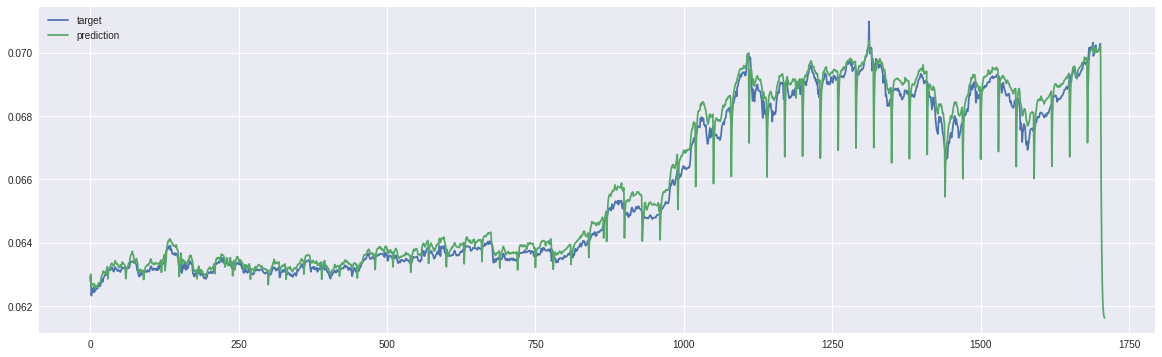

In [0]:
#*** 15b, 128n, 500 epoch, 0.001 reg, tahnRelu
y_prediction = time_series_df(X_test_batch, np.reshape(_3d_to_2d(y_pred), -1))
y_target = time_series_df(X_test_batch, y_test)

plt.figure(figsize=(20, 6))
y_target.iloc[:, 1].plot(label="target")
y_prediction.iloc[:, 1].plot(label="prediction")
plt.legend()

Now trying with two layers:

In [0]:
#same as above with reg but two layers
inputs = Input(shape=(None, 81))

from keras import regularizers

lstm = LSTM(128, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=regularizers.l2(0.001), 
            recurrent_regularizer=regularizers.l2(0.001), bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.3, 
            recurrent_dropout=0.04, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

dense =  TimeDistributed(Dense(64, activation='sigmoid'))(lstm)
predictions = TimeDistributed(Dense(1, activation='relu'))(dense)
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_train_batch, y_train_batch, epochs=500)

Epoch 494/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5893 - acc: 0.0042
Epoch 495/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5895 - acc: 0.0042
Epoch 496/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5897 - acc: 0.0042
Epoch 497/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5896 - acc: 0.0042
Epoch 498/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5907 - acc: 0.0042
Epoch 499/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5896 - acc: 0.0042
Epoch 500/500
228/228 [==============================] - 1s 3ms/step - loss: 0.5901 - acc: 0.0042


In [0]:
y_pred = model.predict(X_test_batch)

In [0]:
#*** 15batchsize, 2layers, 128n, 64n, 500 epoch, 0.001 reg
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.05828078575218899
0.0075521010737519155


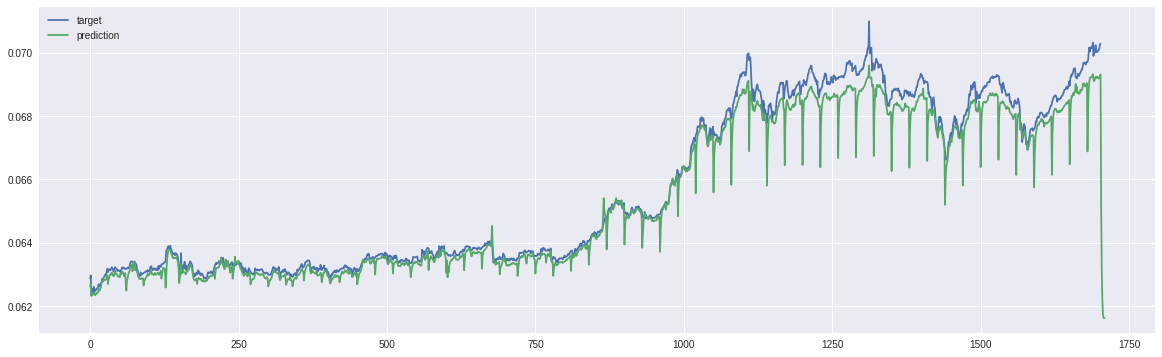

In [0]:
#*** 15batchsize, 2layers, 128n, 64n, 500 epoch, 0.001 reg
y_prediction = time_series_df(X_test_batch, np.reshape(_3d_to_2d(y_pred), -1))
y_target = time_series_df(X_test_batch, y_test)

plt.figure(figsize=(20, 6))
y_target.iloc[:, 1].plot(label="target")
y_prediction.iloc[:, 1].plot(label="prediction")
plt.legend()

0.03186772983143973
0.003549620474649868



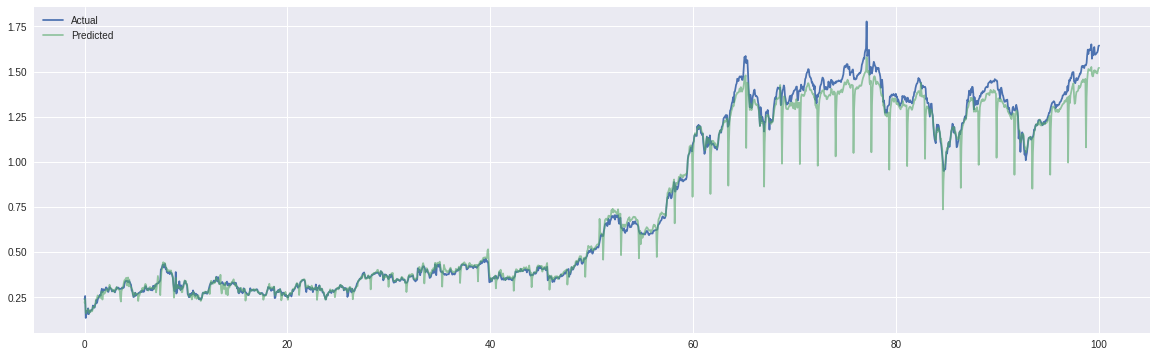

In [0]:
#*** 30btachsize, 2layers, 128n, 64n, 500 epoch, 0.001 reg
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))
print()
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

In [0]:
#same as above with reg but two layers
inputs = Input(shape=(None, 81))

from keras import regularizers

lstm = LSTM(64, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=regularizers.l2(0.001), 
            recurrent_regularizer=regularizers.l2(0.001), bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.3, 
            recurrent_dropout=0.04, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

lstm1 = LSTM(64, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=regularizers.l2(0.001), 
            recurrent_regularizer=regularizers.l2(0.001), bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.3, 
            recurrent_dropout=0.04, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(lstm)

dense =  TimeDistributed(Dense(32, activation='sigmoid'))(lstm1)
predictions = TimeDistributed(Dense(1, activation='relu'))(dense)
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_train_batch, y_train_batch, epochs=250)

In [0]:
y_pred = model.predict(X_test_batch) #5912

In [0]:
#*** 15batchsize, 2layers, 64n, 64n, 250 epoch, 0.001 reg
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.17628436471097744
0.05690793827708927


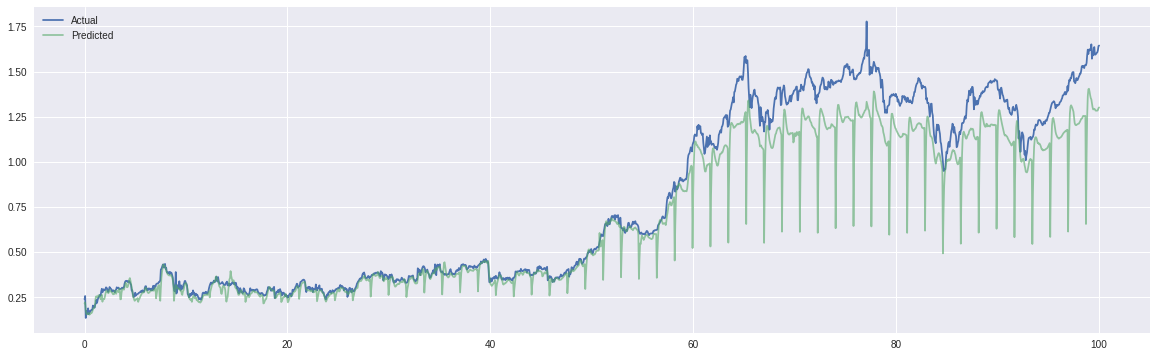

In [0]:
#*** 15batchsize, 2layers, 64n, 64n, 250 epoch, 0.001 reg
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

In [0]:
#*** 30btachsize, 2layers, 128n, 64n, 500 epoch, 0.001 reg
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.07916775337168462
0.010346148877275719


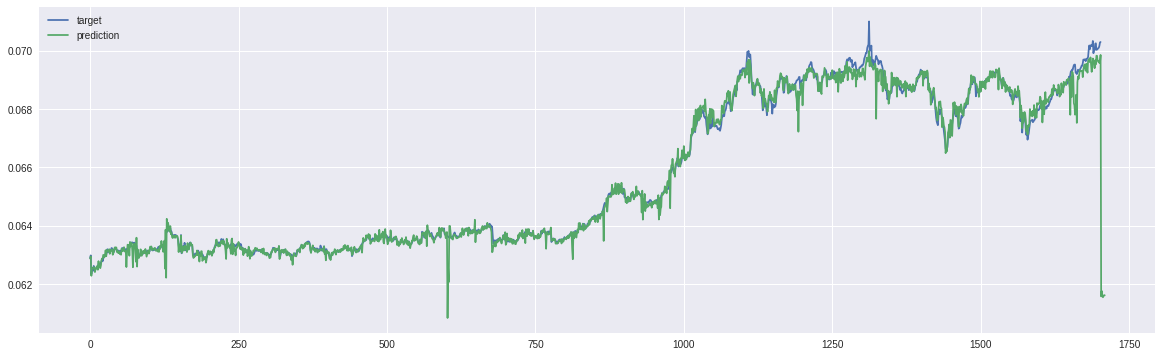

In [0]:
#*** 30batchsize, 128n, 500 epoch
y_prediction = time_series_df(X_test_batch, np.reshape(_3d_to_2d(y_pred), -1))
y_target = time_series_df(X_test_batch, y_test)

plt.figure(figsize=(20, 6))
y_target.iloc[:, 1].plot(label="target")
y_prediction.iloc[:, 1].plot(label="prediction")
plt.legend()

**Using values in file_1 as X (current orders) and predicting y values from file_2 (next traded values):**

In [0]:
X = pd.read_csv(file_1)
y = pd.read_csv(file_2)

In [0]:
pipeline = Pipeline([
                    ('scaling', StandardScaler()), ])

X = pipeline.fit_transform(X.values)
y = pipeline.fit_transform(y.values)
print(X.shape, y.shape)

(9514, 82) (9514, 82)


In [0]:
X = X[:-1000,:-1]
y = y[:-1000, -1]

In [0]:
y = np.expand_dims(y, axis=-1)

In [0]:
X_train, y_train, X_test, y_test = train_test_split(X, y)  
print(len(X_train), len(y_train), len(X_test), len(y_test))

6811 6811 1703 1703


In [0]:
batch_size = 30 #30 is about 165 minute (5.5min per ts x 30)

X_train_batch = reshape_to_batches(X_train, batch_size)
y_train_batch = reshape_to_batches(y_train, batch_size)
print(X_train_batch.shape, y_train_batch.shape)

X_test_batch = reshape_to_batches(X_test, batch_size)
y_test_batch = reshape_to_batches(y_test, batch_size)
print(X_test_batch.shape, y_test_batch.shape)

(228, 30, 81) (228, 30, 1)
(57, 30, 81) (57, 30, 1)


In [0]:
inputs = Input(shape=(None, 81))

from keras import regularizers

lstm = LSTM(128, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=regularizers.l2(0.001), 
            recurrent_regularizer=regularizers.l2(0.001), bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.3, 
            recurrent_dropout=0.04, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

dense =  TimeDistributed(Dense(64, activation='sigmoid'))(lstm)
predictions = TimeDistributed(Dense(1, activation='linear'))(dense)
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])


In [0]:
history = model.fit(X_train_batch, y_train_batch, epochs=1000)


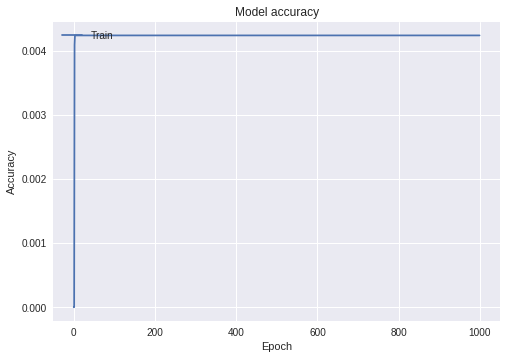

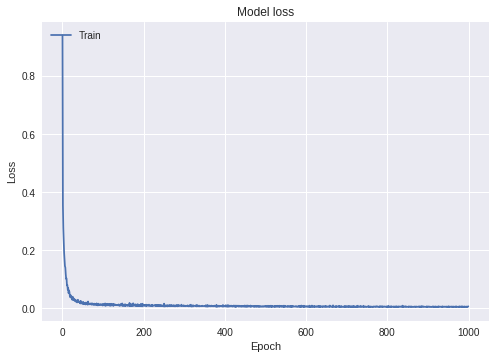

In [0]:
# Plot training accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training 
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X_test_batch)

In [0]:
#*** 128n, 500 epoch
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.0397340146083941
0.003877625008583567


In [0]:
#*** 128n, 1000 epoch
print(mean_absolute_error(y_test, _3d_to_2d(y_pred)[:1703]))
print(mean_squared_error(y_test, _3d_to_2d(y_pred)[:1703]))

0.055016536845666264
0.008255986594288013


Text(0,0.5,'Predicted')

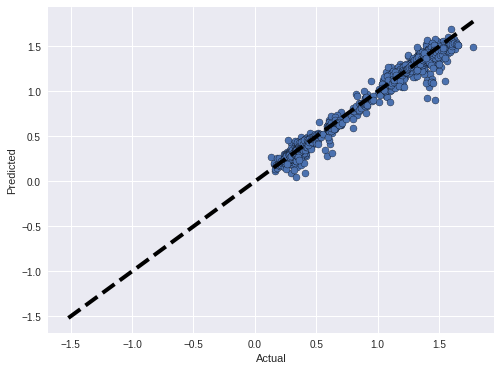

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, _3d_to_2d(y_pred)[:1703], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

Text(0,0.5,'Predicted')

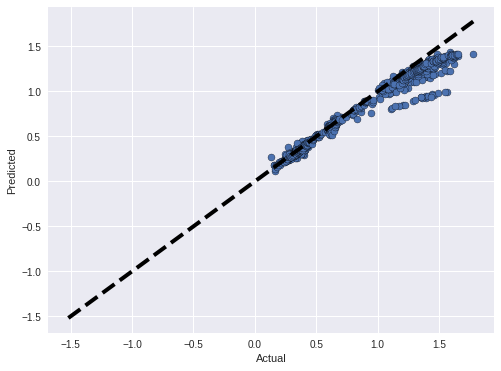

In [0]:
#*** 128n, 1000e
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, _3d_to_2d(y_pred)[:1703], edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

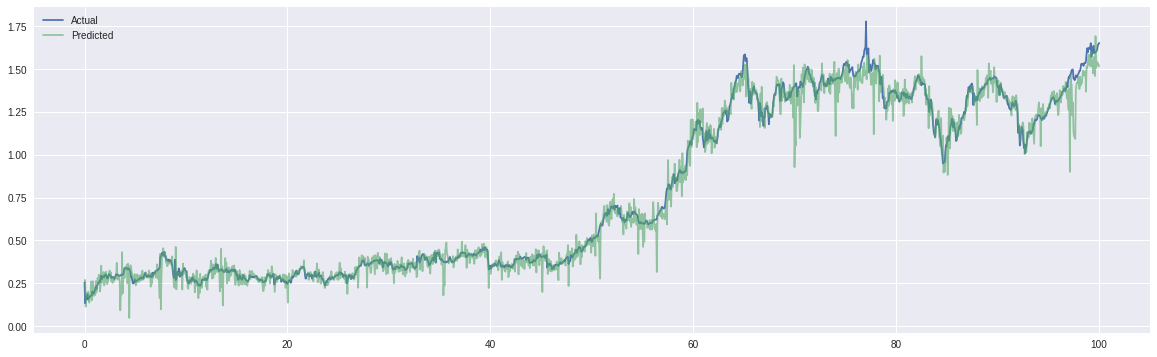

In [0]:
#*** with 128, 500 epoch
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

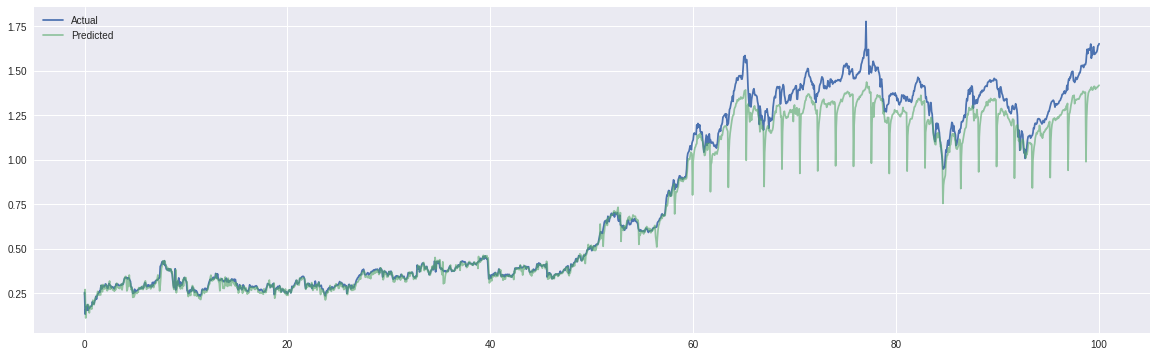

In [0]:
#*** with 128, 1000 epoch
plt.figure(figsize=(20,6))
plt.plot(np.linspace(0, 100, len(y_test)), y_test, label='Actual')
plt.plot(np.linspace(0, 100, len(y_test)), _3d_to_2d(y_pred)[:1703], alpha=0.6, label='Predicted')
plt.legend()

**Now trying LSTM for classification; whether the next price goes up, down or remains constant:**

In [0]:
data_c = pd.read_csv(file_1)
data_c.rename(columns={'Unnamed: 0':'TimeStamp'}, inplace=True)
data_c['Next_mid'] = data_c.Mid.shift(-1)
data_c.dropna(axis=0, inplace=True) #drop the last row which is now Nan

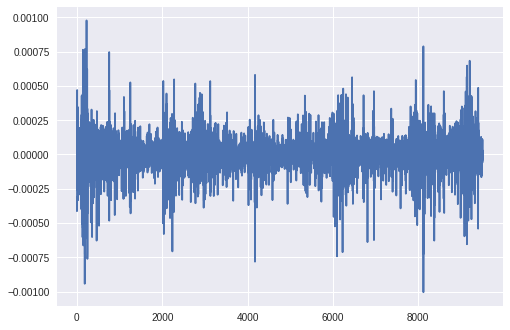

In [8]:
data_c['Price_move'] = data_c.Next_mid - data_c.Mid

data_c.Price_move.plot()

In [9]:
print(data_c[data_c['Price_move'] < 0].TimeStamp.count(), data_c[data_c['Price_move'] == 0].TimeStamp.count(), data_c[data_c['Price_move'] > 0].TimeStamp.count())

4571 37 4905


In [10]:
data_c['up_or_down'] = np.where(data_c['Price_move']<0, 0, 1) #for now defining Price_move=0 as 1 (there are only 37 records where the next price didnt move)
data_c.head(8)

,TimeStamp,B_P1,B_V1,B_P2,B_V2,B_P3,B_V3,B_P4,B_V4,B_P5,...,S_P18,S_V18,S_P19,S_V19,S_P20,S_V20,Mid,Next_mid,Price_move,up_or_down
0,1.521332e+09,0.069306,0.334,0.069309,0.015,0.069313,0.367,0.069314,4.328,0.069316,...,0.069560,23.200,0.069568,0.372,0.069569,1.248,0.069578,0.069264,-0.000314,0
1,1.521333e+09,0.069009,0.334,0.069010,0.279,0.069011,0.030,0.069012,0.016,0.069016,...,0.069244,1.933,0.069247,0.536,0.069250,19.809,0.069264,0.068901,-0.000363,0
2,1.521333e+09,0.068680,1.000,0.068690,1.001,0.068694,0.475,0.068695,2.238,0.068700,...,0.068879,0.075,0.068896,1.400,0.068899,5.695,0.068901,0.068488,-0.000413,0
3,1.521333e+09,0.068332,0.147,0.068340,1.317,0.068341,0.159,0.068350,4.000,0.068358,...,0.068678,5.586,0.068679,0.056,0.068680,2.021,0.068488,0.068260,-0.000228,0
4,1.521334e+09,0.068062,0.320,0.068064,0.819,0.068067,0.400,0.068069,0.040,0.068070,...,0.068234,1.311,0.068236,1.575,0.068245,0.939,0.068260,0.068179,-0.000081,0
5,1.521334e+09,0.068187,1.937,0.068200,0.361,0.068202,0.078,0.068211,0.430,0.068230,...,0.068418,0.159,0.068419,2.567,0.068425,0.275,0.068179,0.068204,0.000025,1
6,1.521334e+09,0.068080,0.388,0.068085,0.430,0.068086,0.400,0.068087,1.000,0.068092,...,0.068201,0.000,0.068202,0.000,0.068200,68.448,0.068204,0.068220,0.000016,1
7,1.521335e+09,0.068083,5.085,0.068091,0.399,0.068092,0.514,0.068093,0.080,0.068099,...,0.068358,0.100,0.068360,0.400,0.068364,0.400,0.068220,0.068690,0.000469,1


In [0]:
data_c.drop(['Mid', 'Next_mid', 'Price_move'], axis=1, inplace=True) #deleting Mid and the other extra columns 

In [0]:
#using all samples
X_y = data_c.values
y = np.expand_dims(X_y[:, -1], axis=1) #is binary and needs to change to categorical instead of scaling
X = X_y[:,:-1]

In [15]:
y_binary = to_categorical(y)
print(y_binary.shape)

(9513, 2)


In [0]:
pipeline = Pipeline([('scaler', StandardScaler())])
X = pipeline.fit_transform(X)

In [0]:
X_train, y_train, X_test, y_test = train_test_split(X, y_binary)  
print(len(X_train), len(y_train), len(X_test), len(y_test))

7610 7610 1903 1903


In [0]:
batch_size = 30 

X_train_batch = reshape_to_batches(X_train, batch_size)
y_train_batch = reshape_to_batches(y_train, batch_size)
print(X_train_batch.shape, y_train_batch.shape)

X_test_batch = reshape_to_batches(X_test, batch_size)
y_test_batch = reshape_to_batches(y_test, batch_size)
print(X_test_batch.shape, y_test_batch.shape)

(254, 30, 81) (254, 30, 2)
(64, 30, 81) (64, 30, 2)


In [0]:
def classification_result(y_pred, thresh=0.5):
  cutt_off_tr = thresh # some threshold

  y_pred[np.where(y_pred >= cutt_off_tr)] = 1 
  y_pred[np.where(y_pred < cutt_off_tr)]  = 0

  print(confusion_matrix(
         _3d_to_2d(y_test_batch)[:, 1], 
         _3d_to_2d(y_pred)[:, 1]))

  print()
  print(classification_report(
          _3d_to_2d(y_test_batch)[:, 1], 
          _3d_to_2d(y_pred)[:, 1],
          target_names = ["Down", "Up"],
          digits = 5))
 

Creating a simple RNN classifier:

In [0]:
inputs = Input(shape=(batch_size, 81))

rnn = SimpleRNN(128, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
                bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, 
                activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
                recurrent_dropout=0.0, return_sequences=True, return_state=False, go_backwards=False, stateful=False, unroll=False)(inputs)

predictions = TimeDistributed(Dense(2, activation='softmax'))(rnn)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop', #learning rate algo
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(X_train_batch, y_train_batch, epochs=500)

In [0]:
y_pred = model.predict(X_test_batch)

In [0]:
#All 9513 samples used, simpleRNN, 64n
classification_result(y_pred)

#this model is relatively balanced in detecting up or down, note that results include 17 extra samples (1920-1903) which are the zero padded fake samples. 

[[419 446]
 [516 539]]

             precision    recall  f1-score   support

       Down    0.44813   0.48439   0.46556       865
         Up    0.54721   0.51090   0.52843      1055

avg / total    0.50257   0.49896   0.50010      1920



In [0]:
#All 9513 samples used, simpleRNN, 128n
classification_result(y_pred)

#this model is better in detecting upward trend

[[300 565]
 [362 693]]

             precision    recall  f1-score   support

       Down    0.45317   0.34682   0.39293       865
         Up    0.55087   0.65687   0.59922      1055

avg / total    0.50686   0.51719   0.50628      1920



In [0]:
inputs = Input(shape=(batch_size, 81))

lstm = LSTM(128, activation='tahn', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
            recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
            recurrent_dropout=0.00, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

predictions =  TimeDistributed(Dense(2, activation='softmax'))(lstm)
model = Model(inputs=inputs, outputs=predictions)

#my_optimizer = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) 
my_optimizer = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0) #best
model.compile(optimizer=my_optimizer, #try rmsprop/Adam optimiser 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train_batch, y_train_batch, epochs=500)

Epoch 1/500
254/254 [==============================] - 2s 7ms/step - loss: 2.9415 - acc: 0.4978
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 1.6262 - acc: 0.5089
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 1.4243 - acc: 0.5215
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 1.0420 - acc: 0.5266
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6826 - acc: 0.5461
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6772 - acc: 0.5533
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6747 - acc: 0.5688
Epoch 8/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6771 - acc: 0.5606
Epoch 9/500
254/254 [==============================] - 1s 2ms/step - loss: 0.9148 - acc: 0.5689
Epoch 10/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6968 - acc: 0.5782
Epoch 11/500
254/254 [=================

In [0]:
y_pred = model.predict(X_test_batch)

In [0]:
#All 9513 samples used, LSTM 128n, activation tahn, rmsprop opt, lr 0.01:

classification_result(y_pred)

[[267 598]
 [312 743]]

             precision    recall  f1-score   support

       Down    0.46114   0.30867   0.36981       865
         Up    0.55406   0.70427   0.62020      1055

avg / total    0.51220   0.52604   0.50739      1920



In [0]:
#All 9513 samples used, 128n, activation tahn, rmsprop opt, lr 0.001:

classification_result(y_pred)

[[482 383]
 [610 445]]

             precision    recall  f1-score   support

       Down    0.44139   0.55723   0.49259       865
         Up    0.53744   0.42180   0.47265      1055

avg / total    0.49417   0.48281   0.48163      1920



In [0]:
#All 9513 samples used, LSTM 128n, activation tahn, rmsprop opt, lr 0.99:

classification_result(y_pred)

[[750 115]
 [896 159]]

             precision    recall  f1-score   support

       Down    0.45565   0.86705   0.59737       865
         Up    0.58029   0.15071   0.23928      1055

avg / total    0.52414   0.47344   0.40061      1920



In [0]:
#All 9513 samples used, LSTM 128n, activation relu, rmsprop opt, lr 0.01:

classification_result(y_pred)

[[126 739]
 [169 886]]

             precision    recall  f1-score   support

       Down    0.42712   0.14566   0.21724       865
         Up    0.54523   0.83981   0.66119      1055

avg / total    0.49202   0.52708   0.46118      1920



In [0]:
***Observations:
above 3 models show that the training samples have at least two diffetent global minima, one (with highest learning rate, 0.99) detects 0 class better, whereas 
the one with learning rate of 0.01 detects class 1 better. (maybe averaging four of these models work best!). RMSProp with relu was very strange as it 
defined most samples as class 1 (upward)
with Adam optimizer however (below) increasing the learning rate makes it worst in both cases

In [0]:
#All 9513 samples used, LSTM 128n, activation tahn, Adam opt, lr 0.001:

classification_result(y_pred)

[[509 356]
 [603 452]]

             precision    recall  f1-score   support

       Down    0.45773   0.58844   0.51492       865
         Up    0.55941   0.42844   0.48524      1055

avg / total    0.51360   0.50052   0.49861      1920



In [0]:
#All 9513 samples used, LSTM 128n, activation tahn, Adam opt, lr 0.01:

classification_result(y_pred)

[[481 384]
 [621 434]]

             precision    recall  f1-score   support

       Down    0.43648   0.55607   0.48907       865
         Up    0.53056   0.41137   0.46343      1055

avg / total    0.48818   0.47656   0.47498      1920



Dissmising the last 1000 samples:

In [0]:
X_y = data_c.values
y = np.expand_dims(X_y[:-1000, -1], axis=1) 
X = X_y[:-1000,:-1]

y_binary = to_categorical(y)
print(y_binary.shape)

pipeline = Pipeline([('scaler', StandardScaler())])
X = pipeline.fit_transform(X)

X_train, y_train, X_test, y_test = train_test_split(X, y_binary)  
print(len(X_train), len(y_train), len(X_test), len(y_test))

batch_size = 30 

X_train_batch = reshape_to_batches(X_train, batch_size)
y_train_batch = reshape_to_batches(y_train, batch_size)
print(X_train_batch.shape, y_train_batch.shape)

X_test_batch = reshape_to_batches(X_test, batch_size)
y_test_batch = reshape_to_batches(y_test, batch_size)
print(X_test_batch.shape, y_test_batch.shape)

(8513, 2)
6810 6810 1703 1703
(227, 30, 81) (227, 30, 2)
(57, 30, 81) (57, 30, 2)


In [0]:
inputs = Input(shape=(batch_size, 81))

lstm = LSTM(128, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
            recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
            recurrent_dropout=0.00, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

predictions =  TimeDistributed(Dense(2, activation='softmax'))(lstm)
model = Model(inputs=inputs, outputs=predictions)

#my_optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) 
my_optimizer = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0) #best
model.compile(optimizer=my_optimizer, #try default 'rmsprop' 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train_batch, y_train_batch, epochs=500)

In [0]:
y_pred = model.predict(X_test_batch)

In [0]:
#last 1k samples dismissed, LSTM 128n, rsmprop, lr 0.01:
classification_result(y_pred)

[[319 404]
 [431 556]]

             precision    recall  f1-score   support

       Down    0.42533   0.44122   0.43313       723
         Up    0.57917   0.56332   0.57114       987

avg / total    0.51412   0.51170   0.51279      1710



In [0]:
#last 1k samples dismissed, LSTM 128n, 'rmsprop' default:
classification_result(y_pred)

[[419 304]
 [552 435]]

             precision    recall  f1-score   support

       Down    0.43151   0.57953   0.49469       723
         Up    0.58863   0.44073   0.50406       987

avg / total    0.52220   0.49942   0.50009      1710



In [0]:
#last 1k samples dismissed, LSTM 128n, Adam, lr 0.001:
classification_result(y_pred)

[[454 269]
 [587 400]]

             precision    recall  f1-score   support

       Down    0.43612   0.62794   0.51474       723
         Up    0.59791   0.40527   0.48309       987

avg / total    0.52950   0.49942   0.49647      1710



Testing the above model (1k samples dismissed) on the data between the yellow points (very first figure in this notebook)

In [0]:
y_test_2 = np.expand_dims(X_y[9120:, -1], axis=1) #test on some unseen data within the same price range as training data 
X_test_2 = X_y[9120:, :-1]

In [0]:
X_test_2 = pipeline.fit_transform(X_test_2)
y_binary_2 = to_categorical(y_test_2)

In [0]:
X_test_2_batches = reshape_to_batches(X_test_2, 30)
y_test_2_batches = reshape_to_batches(y_binary_2, 30)

In [0]:
y_pred_2 = model.predict(X_test_2_batches)

In [0]:
#last 1k samples dismissed, LSTM 128n, rsmprop, lr 0.01:
cutt_off_tr = 0.5 

y_pred_2[np.where(y_pred_2 >= cutt_off_tr)] = 1 
y_pred_2[np.where(y_pred_2 < cutt_off_tr)]  = 0

print(confusion_matrix(
       _3d_to_2d(y_test_2_batches)[:, 1], 
       _3d_to_2d(y_pred_2)[:, 1]))

print()
print(classification_report(
        _3d_to_2d(y_test_2_batches)[:, 1], 
        _3d_to_2d(y_pred_2)[:, 1],
        target_names = ["Down", "Up"],
        digits = 5))
 

[[118 102]
 [ 89 111]]

             precision    recall  f1-score   support

       Down    0.57005   0.53636   0.55269       220
         Up    0.52113   0.55500   0.53753       200

avg / total    0.54675   0.54524   0.54547       420



**Now trying to do big move classification (-0.00025 < price move < 0.00025):**

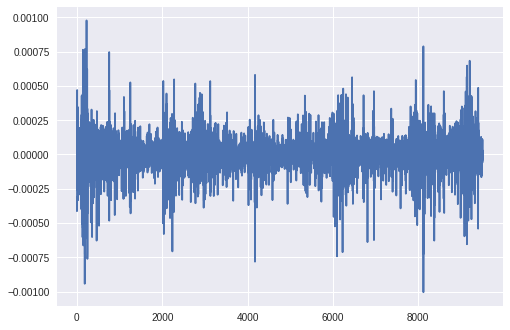

In [16]:
data_c = pd.read_csv(file_1)
data_c.rename(columns={'Unnamed: 0':'TimeStamp'}, inplace=True)
data_c['Next_mid'] = data_c.Mid.shift(-1)
data_c.dropna(axis=0, inplace=True) #drop the last row which is now Nan
data_c['Price_move'] = data_c.Next_mid - data_c.Mid
data_c.Price_move.plot()

In [17]:
data_c['y'] = 0
data_c.loc[(data_c['Price_move'] < -0.00025), 'y'] = 1
data_c.loc[(data_c['Price_move'] > 0.00025), 'y'] = 2
data_c.drop(['Next_mid', 'Mid', 'Price_move'], axis=1, inplace=True)
data_c.head(10)

,TimeStamp,B_P1,B_V1,B_P2,B_V2,B_P3,B_V3,B_P4,B_V4,B_P5,...,S_V16,S_P17,S_V17,S_P18,S_V18,S_P19,S_V19,S_P20,S_V20,y
0,1.521332e+09,0.069306,0.334,0.069309,0.015,0.069313,0.367,0.069314,4.328,0.069316,...,4.166,0.069559,0.870,0.069560,23.200,0.069568,0.372,0.069569,1.248,1
1,1.521333e+09,0.069009,0.334,0.069010,0.279,0.069011,0.030,0.069012,0.016,0.069016,...,0.001,0.069241,0.278,0.069244,1.933,0.069247,0.536,0.069250,19.809,1
2,1.521333e+09,0.068680,1.000,0.068690,1.001,0.068694,0.475,0.068695,2.238,0.068700,...,1.332,0.068875,1.362,0.068879,0.075,0.068896,1.400,0.068899,5.695,1
3,1.521333e+09,0.068332,0.147,0.068340,1.317,0.068341,0.159,0.068350,4.000,0.068358,...,0.684,0.068673,0.635,0.068678,5.586,0.068679,0.056,0.068680,2.021,0
4,1.521334e+09,0.068062,0.320,0.068064,0.819,0.068067,0.400,0.068069,0.040,0.068070,...,0.000,0.068233,4.103,0.068234,1.311,0.068236,1.575,0.068245,0.939,0
5,1.521334e+09,0.068187,1.937,0.068200,0.361,0.068202,0.078,0.068211,0.430,0.068230,...,1.166,0.068408,0.100,0.068418,0.159,0.068419,2.567,0.068425,0.275,0
6,1.521334e+09,0.068080,0.388,0.068085,0.430,0.068086,0.400,0.068087,1.000,0.068092,...,0.000,0.068201,0.000,0.068201,0.000,0.068202,0.000,0.068200,68.448,0
7,1.521335e+09,0.068083,5.085,0.068091,0.399,0.068092,0.514,0.068093,0.080,0.068099,...,0.320,0.068348,0.240,0.068358,0.100,0.068360,0.400,0.068364,0.400,2
8,1.521335e+09,0.068690,1.033,0.068691,0.082,0.068692,0.000,0.068692,0.000,0.068692,...,71.589,0.068897,1.641,0.068900,0.015,0.068912,2.459,0.068913,1.531,0
9,1.521336e+09,0.068606,0.350,0.068607,5.000,0.068610,2.133,0.068614,0.264,0.068624,...,0.264,0.068933,0.451,0.068937,0.400,0.068959,0.278,0.068962,0.238,0


In [18]:
X_y = data_c.values
y = np.expand_dims(X_y[:-1000, -1], axis=1) 
X = X_y[:-1000,:-1]

y_cat = to_categorical(y, num_classes=3)
print(y_cat.shape)

pipeline = Pipeline([('scaler', StandardScaler())])
X = pipeline.fit_transform(X)

X_train, y_train, X_test, y_test = train_test_split(X, y_cat)  
print(len(X_train), len(y_train), len(X_test), len(y_test))

batch_size = 30 

X_train_batch = reshape_to_batches(X_train, batch_size)
y_train_batch = reshape_to_batches(y_train, batch_size)
print(X_train_batch.shape, y_train_batch.shape)

X_test_batch = reshape_to_batches(X_test, batch_size)
y_test_batch = reshape_to_batches(y_test, batch_size)
print(X_test_batch.shape, y_test_batch.shape)

(8513, 3)
6810 6810 1703 1703
(227, 30, 81) (227, 30, 3)
(57, 30, 81) (57, 30, 3)


In [19]:
y_cat[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
inputs = Input(shape=(batch_size, 81))

lstm = LSTM(128, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
            kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
            bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
            recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
            kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
            recurrent_dropout=0.00, implementation=1, return_sequences=True, return_state=False, 
            go_backwards=False, stateful=False, unroll=False)(inputs)

predictions =  TimeDistributed(Dense(3, activation='softmax'))(lstm)
model = Model(inputs=inputs, outputs=predictions)

#my_optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) 
my_optimizer = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0) #best
model.compile(optimizer=my_optimizer, #try default 'rmsprop' 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train_batch, y_train_batch, epochs=200)

227/227 [==============================] - 1s 3ms/step - loss: 2.4191e-04 - acc: 1.0000
Epoch 184/200
227/227 [==============================] - 1s 3ms/step - loss: 7.9130e-04 - acc: 0.9999
Epoch 185/200
227/227 [==============================] - 1s 3ms/step - loss: 0.0192 - acc: 0.9938
Epoch 186/200
227/227 [==============================] - 1s 3ms/step - loss: 0.0250 - acc: 0.9944
Epoch 187/200
227/227 [==============================] - 1s 3ms/step - loss: 0.0054 - acc: 0.9979
Epoch 188/200
227/227 [==============================] - 1s 3ms/step - loss: 0.0069 - acc: 0.9981
Epoch 189/200
227/227 [==============================] - 1s 3ms/step - loss: 0.0035 - acc: 0.9993
Epoch 190/200
227/227 [==============================] - 1s 3ms/step - loss: 0.0012 - acc: 0.9996
Epoch 191/200
227/227 [==============================] - 1s 3ms/step - loss: 4.5838e-04 - acc: 1.0000
Epoch 192/200
227/227 [==============================] - 1s 3ms/step - loss: 3.7343e-04 - acc: 1.0000
Epoch 193/200
227/

In [27]:
model.fit(X_train_batch, y_train_batch, epochs=500)

227/227 [==============================] - 1s 3ms/step - loss: 0.0075 - acc: 0.9974
Epoch 494/500
227/227 [==============================] - 1s 3ms/step - loss: 0.0033 - acc: 0.9988
Epoch 495/500
227/227 [==============================] - 1s 3ms/step - loss: 0.0010 - acc: 0.9999
Epoch 496/500
227/227 [==============================] - 1s 3ms/step - loss: 2.1637e-04 - acc: 1.0000
Epoch 497/500
227/227 [==============================] - 1s 3ms/step - loss: 5.8515e-05 - acc: 1.0000
Epoch 498/500
227/227 [==============================] - 1s 3ms/step - loss: 4.1131e-05 - acc: 1.0000
Epoch 499/500
227/227 [==============================] - 1s 3ms/step - loss: 3.0205e-05 - acc: 1.0000
Epoch 500/500
227/227 [==============================] - 1s 3ms/step - loss: 2.2386e-05 - acc: 1.0000


In [0]:
y_pred = model.predict(X_test_batch)

In [61]:
y_pred[0]

array([[9.9999976e-01, 2.9692046e-07, 1.2161622e-10],
       [9.9999988e-01, 1.5319193e-07, 1.4441765e-13],
       [9.9992251e-01, 7.7487399e-05, 9.2087372e-11],
       [1.0000000e+00, 3.2234226e-09, 7.1196540e-17],
       [1.0000000e+00, 1.5570538e-10, 6.0906435e-10],
       [9.9999225e-01, 4.0207851e-08, 7.7246314e-06],
       [1.0000000e+00, 1.2437461e-12, 8.7271133e-16],
       [9.9946493e-01, 4.5863053e-04, 7.6474076e-05],
       [1.0000000e+00, 5.7872312e-10, 2.1173781e-09],
       [1.0000000e+00, 2.2464160e-18, 1.4989154e-14],
       [9.9999666e-01, 8.4590062e-07, 2.5458214e-06],
       [1.0000000e+00, 1.6963086e-10, 1.9672416e-14],
       [1.0000000e+00, 4.7579795e-13, 3.9323471e-14],
       [9.9999487e-01, 5.0694839e-06, 1.5954470e-08],
       [1.0000000e+00, 1.0366587e-12, 1.3081306e-14],
       [1.0000000e+00, 3.5120774e-20, 5.9306815e-24],
       [1.0000000e+00, 3.1235388e-13, 4.4883985e-10],
       [9.9999881e-01, 2.7796259e-12, 1.2335612e-06],
       [1.0000000e+00, 1.013

In [0]:
def multiclass_classification_result(y_pred, thresh=0.3):
  cutt_off_tr = thresh 
  target_names = ['class 0', 'class 1', 'class 2']
  y_pred[np.where(y_pred < cutt_off_tr)] = 0 
  y_pred[np.where(y_pred > cutt_off_tr)] = 1

  print(classification_report(
          _3d_to_2d(y_test_batch),
          _3d_to_2d(y_pred),
          target_names = target_names,
          digits = 5))

In [14]:
#results with 200 epochs
multiclass_classification_result(y_pred)

              precision    recall  f1-score   support

     class 0    0.96070   0.96890   0.96478      1640
     class 1    0.03922   0.05128   0.04444        39
     class 2    0.04444   0.08333   0.05797        24

   micro avg    0.91029   0.93541   0.92268      1703
   macro avg    0.34812   0.36784   0.35573      1703
weighted avg    0.92669   0.93541   0.93093      1703
 samples avg    0.92105   0.93158   0.92456      1703



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [130]:
#results with 500 epochs
multiclass_classification_result(y_pred)

              precision    recall  f1-score   support

     class 0    0.96107   0.96341   0.96224      1640
     class 1    0.08163   0.10256   0.09091        39
     class 2    0.05769   0.12500   0.07895        24

   micro avg    0.90946   0.93188   0.92053      1703
   macro avg    0.36680   0.39699   0.37737      1703
weighted avg    0.92820   0.93188   0.92984      1703
 samples avg    0.91930   0.92807   0.92222      1703



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [0]:
y_test_inv = [np.argmax(a, axis=1, out=None) for a in y_test_batch]

In [0]:
y_pred_inv = [np.argmax(a, axis=1, out=None) for a in y_pred]

In [0]:
y_pred_inv_2 = [a for b in y_pred_inv for a in b]
y_test_inv_2 = [a for b in y_test_inv for a in b]

In [86]:
#results with 500 epochs #with y_inv

print(confusion_matrix(y_test_inv_2, y_pred_inv_2))
  
print(classification_report(y_test_inv_2, y_pred_inv_2, target_names=['Class_0', 'Class_1', 'Class_2']))
#have in mind there are 7 extra samples compared to above which are the zero padded rows, all classified as class_0 

[[1568   59   20]
 [  34    5    0]
 [  18    4    2]]
              precision    recall  f1-score   support

     Class_0       0.97      0.95      0.96      1647
     Class_1       0.07      0.13      0.09        39
     Class_2       0.09      0.08      0.09        24

   micro avg       0.92      0.92      0.92      1710
   macro avg       0.38      0.39      0.38      1710
weighted avg       0.94      0.92      0.93      1710



In [84]:
#results with 500 epochs with y_inv removing the last 7 zero padded values

print(confusion_matrix(y_test_inv_2[:-7], y_pred_inv_2[:-7]))
  
print(classification_report(y_test_inv_2[:-7], y_pred_inv_2[:-7], target_names=['Class_0', 'Class_1', 'Class_2'], digits=5))


[[1561   59   20]
 [  34    5    0]
 [  18    4    2]]
              precision    recall  f1-score   support

     Class_0    0.96776   0.95183   0.95973      1640
     Class_1    0.07353   0.12821   0.09346        39
     Class_2    0.09091   0.08333   0.08696        24

   micro avg    0.92073   0.92073   0.92073      1703
   macro avg    0.37740   0.38779   0.38005      1703
weighted avg    0.93493   0.92073   0.92759      1703

